In [2]:
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 11


In [3]:
# Paleta
palette_hospitality = [
    "#1F3C4B", "#2C6E91", "#6B8E23", "#4F7C6B",
    "#E6D5B8", "#D8CFC4", "#C97C5D", "#C9A24D",
    "#4A4A4A", "#9E9E9E", "#F7F4EF", "#1C1C1C"
]

sns.set_theme(
    style="whitegrid",
    palette=palette_hospitality,
    rc={
        "figure.figsize": (10, 6),
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "lines.linewidth": 2,
        "grid.alpha": 0.3,
        "font.size": 11
    }
)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette_hospitality)

In [4]:
df = pd.read_csv("../../Datos/DatosTransformados/df_limpio.csv")
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,momento_checkin,ratio_asistencia,ratio_cancelaciones_mes_respecto_reservas,zona_roja,estacion_estancia,estacion_reserva,antiguedad_hotel_en_dias,es_festivo,es_finde,city
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.25171,1,invierno,otoño,2123,False,False,Donostia
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,antes,1.000000,0.25171,1,invierno,invierno,2123,True,False,Donostia
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,antes,0.333333,0.25171,1,invierno,otoño,2123,True,False,Donostia
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,antes,0.500000,0.25171,1,invierno,otoño,2123,False,False,Donostia
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,antes,1.000000,0.25171,1,invierno,otoño,2123,False,False,Donostia


### Número de reservas por ciudad

Este gráfico muestra el volumen de reservas por ciudad, lo que permite evaluar la importancia turística relativa de cada localización dentro del negocio de Líbere.

Las ciudades con mayor número de reservas representan los principales focos de demanda y concentran una parte significativa de la actividad operativa de la compañía.


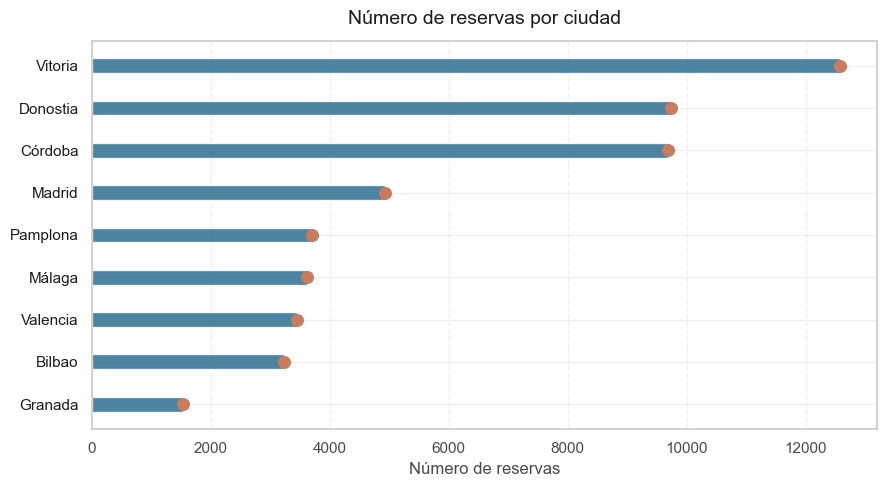

In [5]:

city_counts = df['city'].value_counts()

plt.figure(figsize=(9, 5))

bar_color = palette_hospitality[1]     
point_color = palette_hospitality[6]   
title_color = palette_hospitality[11]  
label_color = palette_hospitality[8]   

plt.barh(
    city_counts.index,
    city_counts.values,
    height=0.35,
    color=bar_color,
    alpha=0.85
)
plt.scatter(
    city_counts.values,
    city_counts.index,
    s=70,
    color=point_color,
    zorder=3
)

plt.title(
    "Número de reservas por ciudad",
    pad=12,
    color=title_color
)
plt.xlabel("Número de reservas", color=label_color)
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()
plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=title_color)
plt.tight_layout()
plt.show()


### Ingresos totales por ciudad

Este gráfico analiza la contribución económica de cada ciudad, agregando el valor neto de todas las reservas realizadas en cada una de ellas.

Permite identificar qué ciudades generan mayores ingresos totales, independientemente del volumen de reservas, reflejando posibles diferencias en precios, duración de las estancias o perfil de cliente.


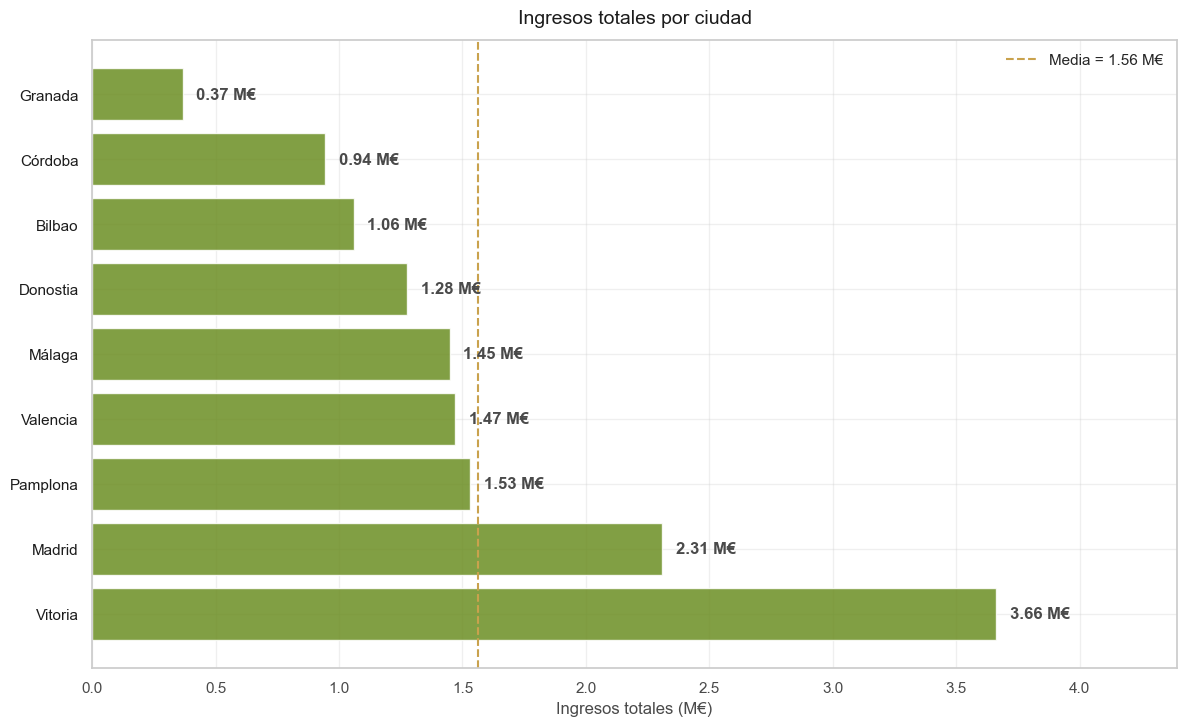

In [6]:
ingresos_ciudad = (
    df.groupby('city')['reservation_net_value']
      .sum()
      .sort_values(ascending=False)
)

cities = ingresos_ciudad.index
values = ingresos_ciudad.values
values_m = values / 1_000_000

bar_color   = palette_hospitality[2]   
mean_color  = palette_hospitality[7]   
text_color  = palette_hospitality[8]   
title_color = palette_hospitality[11]  

plt.figure(figsize=(12, 0.6 * len(cities) + 2))

bars = plt.barh(
    cities,
    values_m,
    alpha=0.85,
    color=bar_color
)

max_value_m = values_m.max()
for bar, val_m in zip(bars, values_m):
    plt.text(
        val_m + max_value_m * 0.015,
        bar.get_y() + bar.get_height() / 2,
        f"{val_m:,.2f} M€",
        va='center',
        fontsize=12,
        fontweight='bold',
        color=text_color
    )

mean_val_m = values_m.mean()
plt.axvline(
    mean_val_m,
    color=mean_color,
    linestyle='--',
    linewidth=1.5,
    label=f"Media = {mean_val_m:,.2f} M€"
)

plt.xlabel("Ingresos totales (M€)", color=text_color)
plt.title(
    "Ingresos totales por ciudad",
    color=title_color,
    pad=12
)

plt.legend(frameon=False)
plt.tick_params(axis='x', colors=text_color)
plt.tick_params(axis='y', colors=title_color)
plt.xlim(0, max_value_m * 1.2)
plt.tight_layout()
plt.show()


### Relación entre volumen de reservas e ingresos por ciudad

Este gráfico relaciona el número de reservas con los ingresos totales por ciudad, permitiendo identificar diferencias entre destinos con alto volumen y destinos con mayor valor económico.

Las líneas de referencia indican los valores medios, facilitando la identificación de ciudades que se sitúan por encima o por debajo de la media en ambas dimensiones.


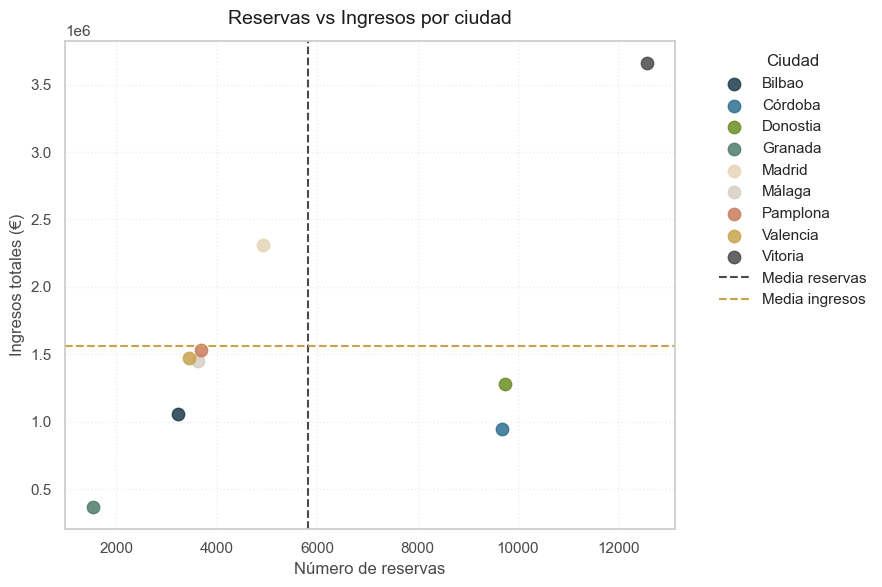

In [7]:
city_stats = (
    df.groupby('city')
      .agg(
          reservas=('reservation_net_value', 'count'),
          ingresos=('reservation_net_value', 'sum')
      )
)

plt.figure(figsize=(9, 6))
from itertools import cycle
color_cycle = cycle(palette_hospitality)
for city, row in city_stats.iterrows():
    plt.scatter(
        row['reservas'],
        row['ingresos'],
        s=80,
        alpha=0.85,
        label=city,
        color=next(color_cycle)
    )

plt.axvline(
    city_stats['reservas'].mean(),
    linestyle='--',
    color=palette_hospitality[8],  
    linewidth=1.5,
    label="Media reservas"
)

plt.axhline(
    city_stats['ingresos'].mean(),
    linestyle='--',
    color=palette_hospitality[7],  
    linewidth=1.5,
    label="Media ingresos"
)

plt.title(
    "Reservas vs Ingresos por ciudad",
    color=palette_hospitality[11],
    pad=12
)
plt.xlabel("Número de reservas", color=palette_hospitality[8])
plt.ylabel("Ingresos totales (€)", color=palette_hospitality[8])

plt.grid(True, linestyle=':', alpha=0.35)
plt.legend(
    title="Ciudad",
    frameon=False,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tick_params(axis='both', colors=palette_hospitality[8])
plt.tight_layout()
plt.show()


### Distribución del ingreso medio por noche (ADR) según ciudad

Este gráfico analiza la distribución del ingreso medio por noche (ADR) en cada ciudad.

La línea horizontal representa la mediana global del ADR, facilitando la comparación entre ciudades y la identificación de destinos con precios estructuralmente más elevados.


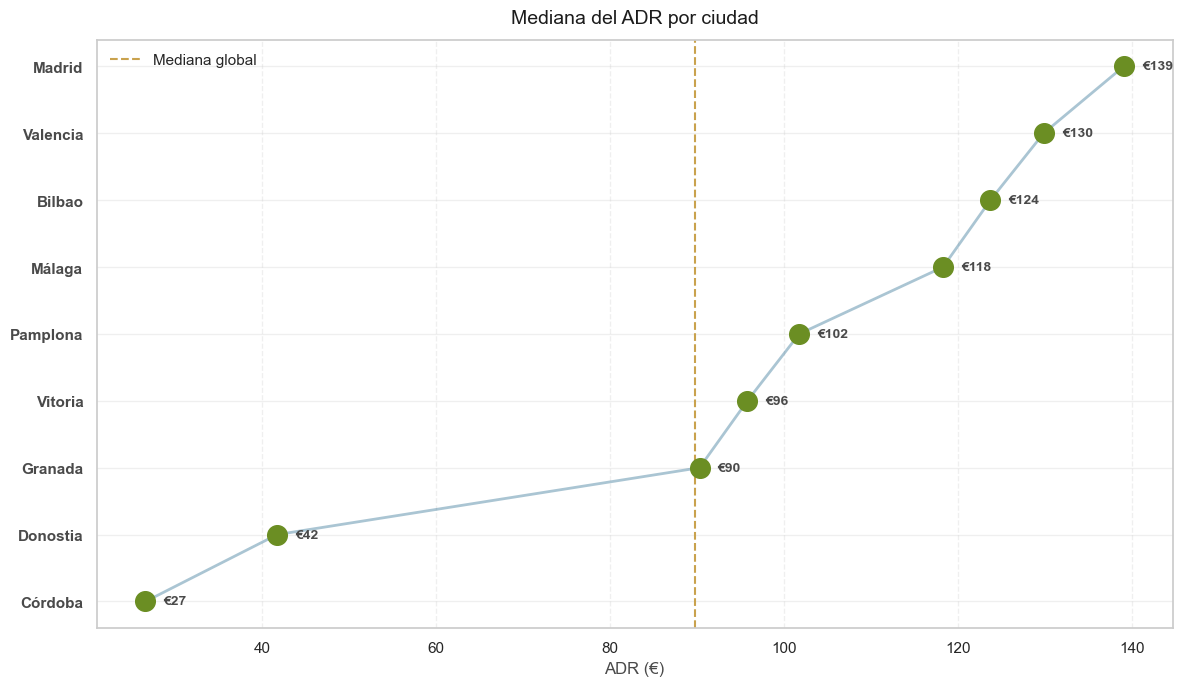

In [8]:
cities = df.groupby('city')['total_adr'].median().sort_values(ascending=False)
values = cities.values
y_pos = np.arange(len(cities))

plt.figure(figsize=(12, 7))
line_color  = palette_hospitality[1]  
point_color = palette_hospitality[2]  
median_color = palette_hospitality[7] 
text_color  = palette_hospitality[8] 

plt.plot(values, y_pos, linewidth=2, alpha=0.4, color=line_color)
plt.scatter(values, y_pos, s=200, zorder=3, color=point_color)

plt.axvline(
    df['total_adr'].median(),
    linestyle='--',
    linewidth=1.5,
    color=median_color,
    label="Mediana global"
)

max_val = values.max()
for i, val in enumerate(values):
    plt.text(
        val + max_val * 0.015,
        y_pos[i],
        f"€{val:,.0f}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

plt.yticks(y_pos, cities.index, fontsize=11, fontweight='bold', color=text_color)
plt.xlabel("ADR (€)", color=text_color)
plt.title("Mediana del ADR por ciudad", pad=12, color=palette_hospitality[11])
plt.legend(frameon=False)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Ingreso medio por reserva según ciudad

Este gráfico muestra el ingreso medio por reserva en cada ciudad, permitiendo detectar aquellas localizaciones que generan mayor valor económico por cliente.

Este análisis resulta clave para estrategias de pricing y segmentación, ya que una ciudad con menor volumen de reservas puede presentar una mayor rentabilidad por operación individual.


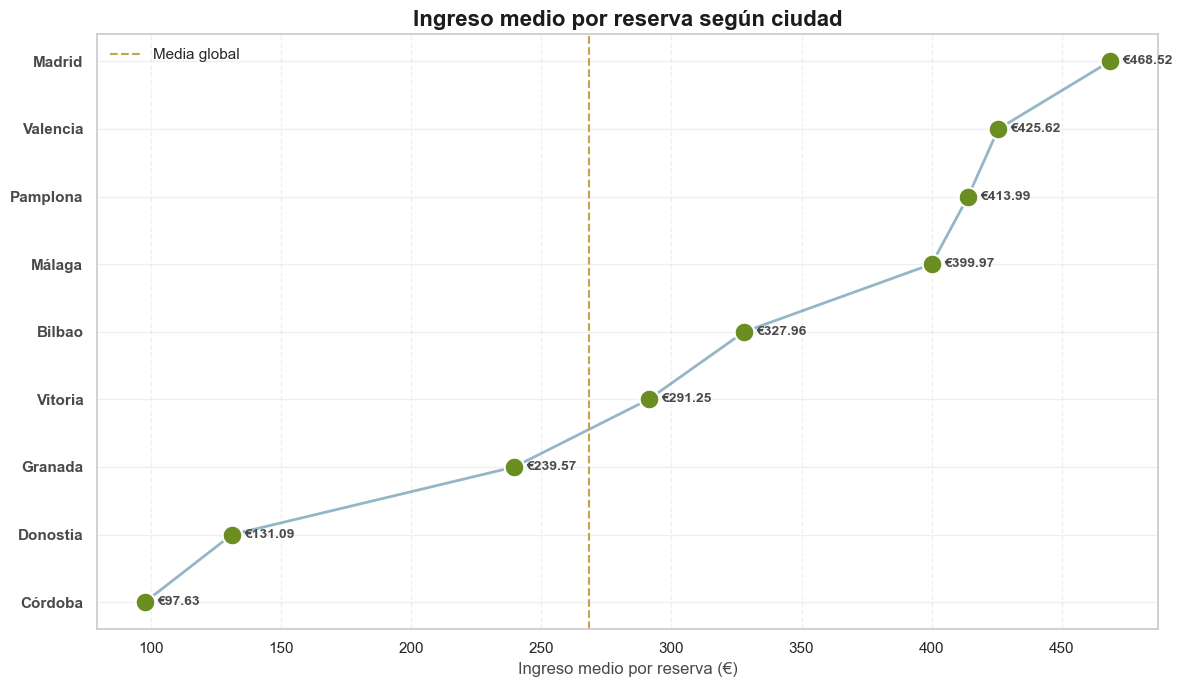

In [9]:
ingreso_medio = (
    df.groupby('city')['reservation_net_value']
      .mean()
      .sort_values(ascending=False)
)

values = ingreso_medio.values
y_pos = np.arange(len(ingreso_medio))

plt.figure(figsize=(12, 7))

line_color   = palette_hospitality[1]  
point_color  = palette_hospitality[2]  
mean_color   = palette_hospitality[7]  
text_color   = palette_hospitality[8] 
title_color  = palette_hospitality[11] 

plt.plot(values, y_pos, color=line_color, linewidth=2, alpha=0.5)
plt.scatter(
    values, y_pos,
    s=200,
    color=point_color,
    edgecolor="white",
    linewidth=1.5,
    zorder=3
)

mean_val = df['reservation_net_value'].mean()
plt.axvline(mean_val, color=mean_color, linestyle='--', linewidth=1.5, label='Media global')
for i, val in enumerate(values):
    plt.text(
        val + max(values)*0.01,
        y_pos[i],
        f"€{val:,.2f}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

plt.yticks(y_pos, ingreso_medio.index, fontsize=11, fontweight='bold', color=text_color)
plt.xlabel("Ingreso medio por reserva (€)", fontsize=12, color=text_color)
plt.title("Ingreso medio por reserva según ciudad", fontsize=16, fontweight='bold', color=title_color)
plt.legend(frameon=False)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Hoteles con mayores ingresos totales

En este gráfico se identifican los hoteles (assets) que generan mayores ingresos totales dentro de la cadena.

Estos activos pueden considerarse estratégicos para el negocio, ya que concentran una parte significativa de los ingresos y cualquier variación en su comportamiento tiene un impacto económico relevante.


C:\Users\togui\AppData\Local\Temp\ipykernel_17200\1515589922.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


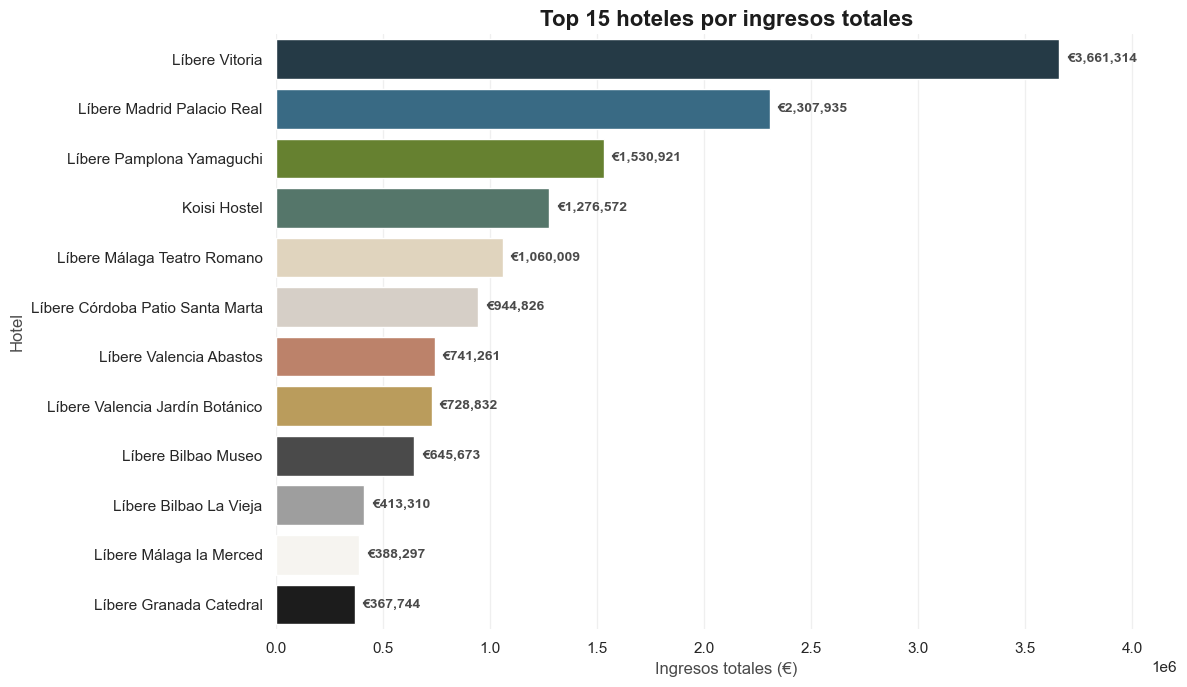

In [10]:
top_assets = (
    df.groupby('asset')['reservation_net_value']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12, 7))
from itertools import cycle
color_cycle = cycle(palette_hospitality)
bar_colors = [next(color_cycle) for _ in range(len(top_assets))]

sns.barplot(
    x=top_assets.values,
    y=top_assets.index,
    palette=bar_colors,
    edgecolor="white"
)

for i, val in enumerate(top_assets.values):
    plt.text(
        val + max(top_assets.values)*0.01,
        i,
        f"€{val:,.0f}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  
    )

plt.title(
    "Top 15 hoteles por ingresos totales",
    fontsize=16,
    fontweight='bold',
    color=palette_hospitality[11]  
)
plt.xlabel("Ingresos totales (€)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Hotel", fontsize=12, color=palette_hospitality[8])
plt.xlim(0, max(top_assets.values) * 1.15)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


### Tasa global de cancelación

Antes de analizar patrones específicos, se calcula la tasa global de cancelación del conjunto de reservas.

Este valor sirve como referencia general del problema y permite contextualizar los análisis posteriores relacionados con el comportamiento de cancelación de los usuarios.


In [11]:
df['ha_cancelado'].value_counts(normalize=True) * 100


ha_cancelado
False    75.616778
True     24.383222
Name: proportion, dtype: float64

### Tasa de cancelación por ciudad

Este gráfico muestra la probabilidad de cancelación de las reservas en función de la ciudad en la que se encuentra el hotel.

Las diferencias observadas entre ciudades sugieren que el contexto turístico, el tipo de cliente o las características del destino influyen en el comportamiento de cancelación.


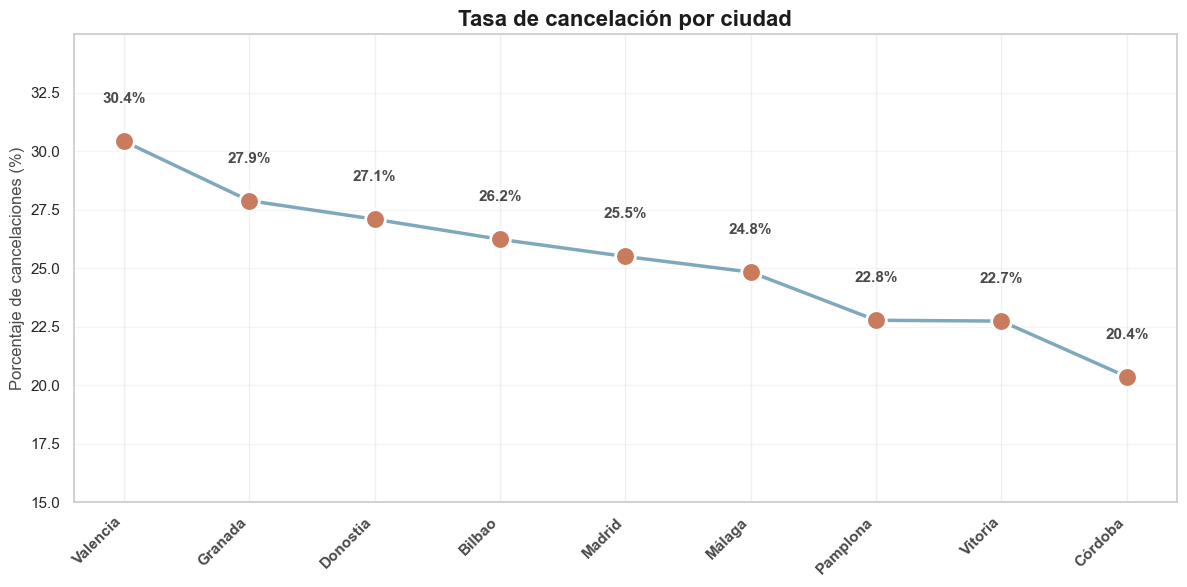

In [12]:
cancel_city = (
    df.groupby('city')['ha_cancelado']
      .mean()
      .sort_values(ascending=False)
)

cities = cancel_city.index
values = cancel_city.values * 100
x = np.arange(len(cities))

plt.figure(figsize=(12, 6))
line_color  = palette_hospitality[1]  
point_color = palette_hospitality[6]  
text_color  = palette_hospitality[8] 
title_color = palette_hospitality[11] 
plt.plot(x, values, color=line_color, linewidth=2.5, alpha=0.6)
plt.scatter(x, values, s=200, color=point_color, edgecolor="white", linewidth=2, zorder=3)
for xi, val in zip(x, values):
    plt.text(
        xi, val + 1.5,
        f"{val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color=text_color
    )

plt.xticks(x, cities, rotation=45, ha='right', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel("Porcentaje de cancelaciones (%)", fontsize=12, color=text_color)
plt.title("Tasa de cancelación por ciudad", fontsize=16, fontweight='bold', color=title_color)

plt.ylim(15, max(values) * 1.15)
plt.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()


### Cancelación según antelación de la reserva (lead time)

Este gráfico analiza la relación entre la antelación con la que se realiza la reserva (lead time) y la probabilidad de cancelación.

Se observa que las reservas realizadas con mayor antelación tienden a presentar una mayor propensión a cancelarse, lo que puede explicarse por una mayor incertidumbre en los planes del cliente.


### Cancelación según tipo de tarifa

Este gráfico muestra cómo el tipo de tarifa influye en la tasa de cancelación de las reservas.

Las tarifas flexibles suelen presentar mayores niveles de cancelación, mientras que las tarifas no reembolsables actúan como un mecanismo de reducción del riesgo para la empresa.


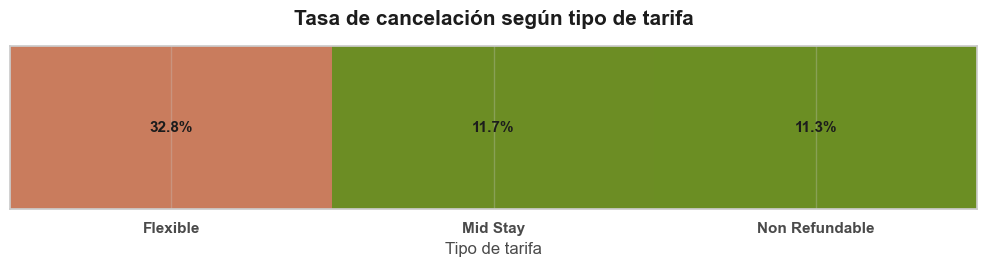

In [13]:
cancel_rate = (
    df.groupby('rate_type')['ha_cancelado']
      .mean()
      .sort_values(ascending=False)
)

values = cancel_rate.values * 100
labels = cancel_rate.index
data = values.reshape(1, -1)
plt.figure(figsize=(10, 2.8))
from matplotlib.colors import LinearSegmentedColormap

grad_cmap = LinearSegmentedColormap.from_list(
    "cancel_palette",
    [palette_hospitality[2], palette_hospitality[6]]  # verde → cálido
)

im = plt.imshow(
    data,
    cmap=grad_cmap,
    aspect="auto"
)
plt.yticks([])
plt.xticks(np.arange(len(labels)), labels, fontsize=11, fontweight='bold', color=palette_hospitality[8])
for i, val in enumerate(values):
    plt.text(
        i, 0,
        f"{val:.1f}%",
        ha="center",
        va="center",
        fontsize=11,
        fontweight="bold",
        color=palette_hospitality[11]  
    )

plt.title(
    "Tasa de cancelación según tipo de tarifa",
    fontsize=15,
    fontweight="bold",
    pad=15,
    color=palette_hospitality[11]
)
plt.xlabel("Tipo de tarifa", color=palette_hospitality[8], fontsize=12)
plt.tight_layout()
plt.show()


### Evolución de la tasa de cancelación según el lead time

Este gráfico muestra cómo varía la tasa de cancelación en función de la antelación de la reserva, agrupando el lead time en tramos.

La línea permite identificar tendencias claras y posibles umbrales a partir de los cuales la probabilidad de cancelación aumenta de forma significativa.


C:\Users\togui\AppData\Local\Temp\ipykernel_17200\3538900145.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_grouped')['ha_cancelado']


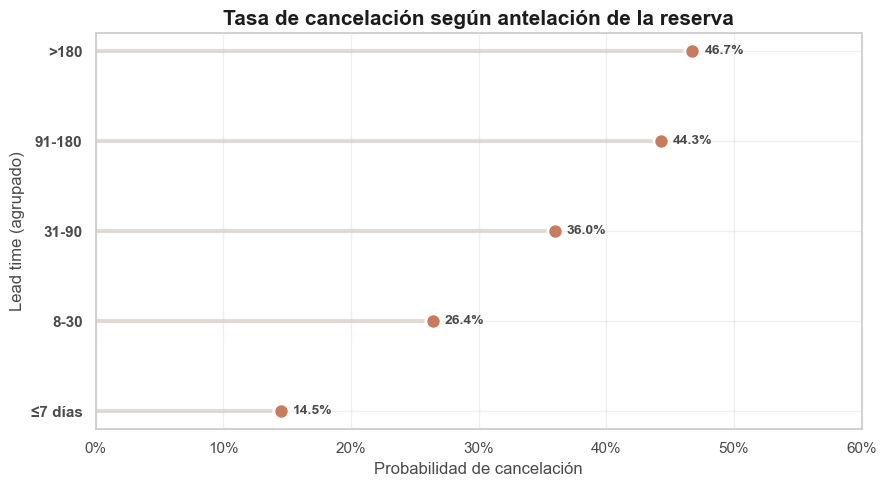

In [14]:
df['lead_time_grouped'] = pd.cut(
    df['lead_time'],
    bins=[0, 7, 30, 90, 180, df['lead_time'].max()],
    labels=['≤7 días', '8-30', '31-90', '91-180', '>180']
)

cancel_lead = (
    df.groupby('lead_time_grouped')['ha_cancelado']
      .mean()
)

y_pos = np.arange(len(cancel_lead.index))
values = cancel_lead.values

plt.figure(figsize=(9, 5))

line_color  = palette_hospitality[5]  
point_color = palette_hospitality[6]  
text_color  = palette_hospitality[8]  
title_color = palette_hospitality[11] 
plt.hlines(
    y=y_pos,
    xmin=0,
    xmax=values,
    color=line_color,
    alpha=0.7,
    linewidth=3
)
plt.scatter(
    values,
    y_pos,
    color=point_color,
    s=120,
    edgecolor="white",
    linewidth=2,
    zorder=3
)
for i, val in enumerate(values):
    plt.text(
        val + (values.max() * 0.02),
        i,
        f"{val:.1%}",
        va='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

plt.yticks(y_pos, cancel_lead.index, fontsize=11, fontweight='bold', color=text_color)
plt.xlim(0, values.max() * 1.15)
ticks = plt.xticks()[0]

plt.xticks(ticks, [f"{t*100:.0f}%" for t in ticks], color=text_color)
plt.title(
    "Tasa de cancelación según antelación de la reserva",
    fontsize=15,
    fontweight='bold',
    color=title_color
)
plt.xlabel("Probabilidad de cancelación", color=text_color)
plt.ylabel("Lead time (agrupado)", color=text_color)

# Grid ligera
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Cancelación según temporada de estancia

Este gráfico analiza la probabilidad de cancelación en función de la temporada en la que se produce la estancia.

Permite identificar diferencias estacionales en el comportamiento del cliente, que pueden estar relacionadas con la demanda turística o la planificación del viaje.


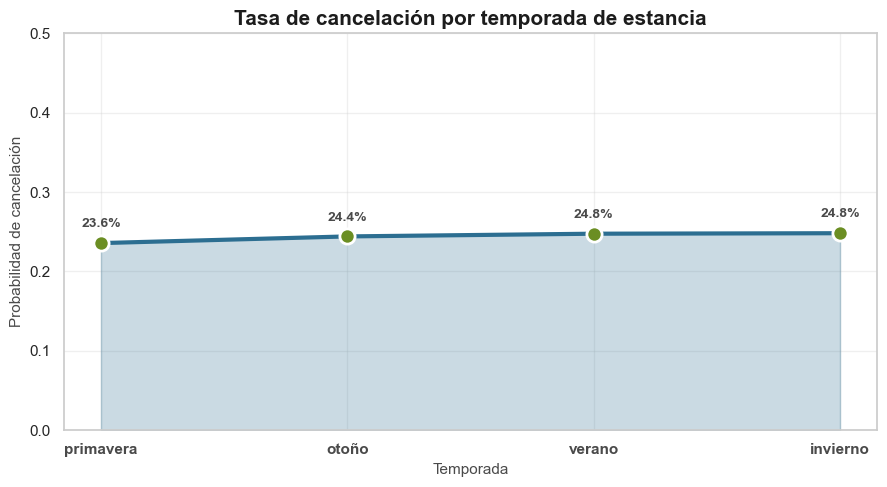

In [15]:
cancel_season = (
    df.groupby('estacion_estancia')['ha_cancelado']
      .mean()
      .sort_values()
)

x = np.arange(len(cancel_season.index))
y = cancel_season.values

plt.figure(figsize=(9, 5))

area_color  = palette_hospitality[1]  
line_color  = palette_hospitality[1]  
point_color = palette_hospitality[2]  
text_color  = palette_hospitality[8] 
title_color = palette_hospitality[11] 

plt.fill_between(
    x, y,
    color=area_color,
    alpha=0.25
)

plt.plot(
    x, y,
    color=line_color,
    linewidth=3
)
plt.scatter(
    x, y,
    s=120,
    color=point_color,
    edgecolor="white",
    linewidth=2,
    zorder=3
)
for i, val in enumerate(y):
    plt.text(
        i, val + 0.02,
        f"{val:.1%}",
        ha='center',
        fontsize=10,
        fontweight='bold',
        color=text_color
    )

plt.xticks(x, cancel_season.index, fontsize=11, fontweight='bold', color=text_color)
plt.ylim(0, 0.5)
plt.xlabel("Temporada", fontsize=11, color=text_color)
plt.ylabel("Probabilidad de cancelación", fontsize=11, color=text_color)
plt.title(
    "Tasa de cancelación por temporada de estancia",
    fontsize=15,
    fontweight='bold',
    color=title_color
)

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Relación entre valor de la reserva y probabilidad de cancelación

Este gráfico analiza cómo varía la tasa de cancelación en función del valor económico de la reserva, agrupando el valor en cuantiles.

Permite evaluar si las reservas de mayor importe presentan comportamientos diferenciados respecto a las de menor valor.


C:\Users\togui\AppData\Local\Temp\ipykernel_17200\540945762.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('value_quantile')['ha_cancelado']
C:\Users\togui\AppData\Local\Temp\ipykernel_17200\540945762.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


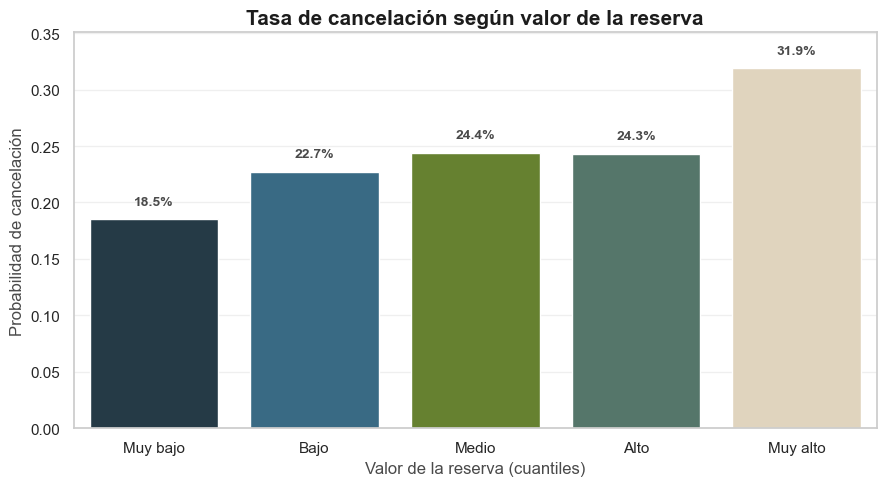

In [16]:
df['value_quantile'] = pd.qcut(
    df['reservation_net_value'],
    q=5,
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
)

cancel_value = (
    df.groupby('value_quantile')['ha_cancelado']
      .mean()
)

plt.figure(figsize=(9,5))
from itertools import cycle
color_cycle = cycle(palette_hospitality)
bar_colors = [next(color_cycle) for _ in range(len(cancel_value))]

sns.barplot(
    x=cancel_value.index,
    y=cancel_value.values,
    palette=bar_colors,
    edgecolor="white"
)

for i, val in enumerate(cancel_value.values):
    plt.text(
        i,
        val + 0.01,
        f"{val:.1%}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  
    )

plt.title(
    "Tasa de cancelación según valor de la reserva",
    fontsize=15,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Valor de la reserva (cuantiles)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Probabilidad de cancelación", fontsize=12, color=palette_hospitality[8])
plt.ylim(0, cancel_value.max() * 1.1)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Diferencias de cancelación entre clientes nuevos y recurrentes

Este gráfico compara directamente la tasa de cancelación entre clientes nuevos y clientes recurrentes.

La línea horizontal representa la tasa media global de cancelación, facilitando la comparación visual.


C:\Users\togui\AppData\Local\Temp\ipykernel_17200\3775287906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


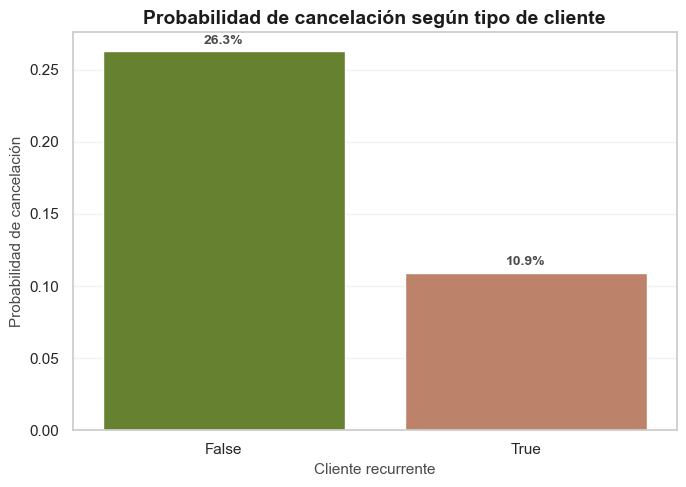

In [17]:
plt.figure(figsize=(7, 5))

bar_colors = [palette_hospitality[2], palette_hospitality[6]]  
sns.barplot(
    data=df,
    x='returning_inhabitant',
    y='ha_cancelado',
    palette=bar_colors,
    errorbar=None
)

for i, val in enumerate(df.groupby('returning_inhabitant')['ha_cancelado'].mean()):
    plt.text(
        i,
        val + 0.003,  
        f"{val:.1%}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  
    )

plt.title(
    "Probabilidad de cancelación según tipo de cliente",
    fontsize=14,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Cliente recurrente", fontsize=11, color=palette_hospitality[8])
plt.ylabel("Probabilidad de cancelación", fontsize=11, color=palette_hospitality[8])
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()


### Valor económico de la reserva y cancelación

Este gráfico compara el valor económico de las reservas canceladas frente a las no canceladas.

Dado que existen valores extremos muy elevados que distorsionan la visualización, se han aplicado límites al eje vertical utilizando percentiles, lo que permite analizar el comportamiento general de las reservas sin que los outliers dominen el gráfico.


C:\Users\togui\AppData\Local\Temp\ipykernel_17200\355608810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


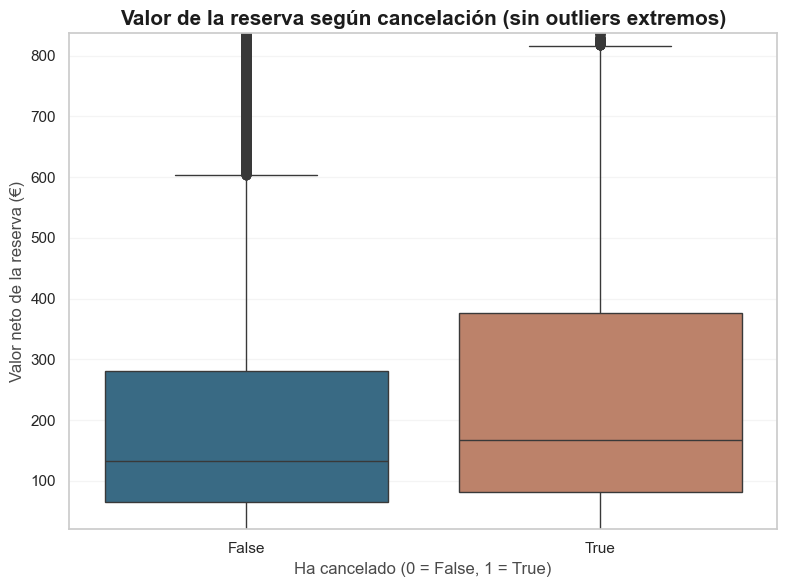

In [18]:
lim_inf = df['reservation_net_value'].quantile(0.05)
lim_sup = df['reservation_net_value'].quantile(0.95)

plt.figure(figsize=(8,6))

box_colors = [palette_hospitality[1], palette_hospitality[6]]  
sns.boxplot(
    data=df,
    x='ha_cancelado',
    y='reservation_net_value',
    palette=box_colors
)

plt.ylim(lim_inf, lim_sup)
plt.title(
    "Valor de la reserva según cancelación (sin outliers extremos)",
    fontsize=15,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Ha cancelado (0 = False, 1 = True)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Valor neto de la reserva (€)", fontsize=12, color=palette_hospitality[8])
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


### Cancelación y recurrencia del cliente

Este gráfico analiza la relación entre la recurrencia del cliente y la probabilidad de cancelación.

Los clientes con estancias previas muestran, en general, una menor propensión a cancelar, lo que refuerza la importancia de los programas de fidelización y la relación a largo plazo con el cliente.


C:\Users\togui\AppData\Local\Temp\ipykernel_17200\3782684917.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('recurrence_grouped')['ha_cancelado']
C:\Users\togui\AppData\Local\Temp\ipykernel_17200\3782684917.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


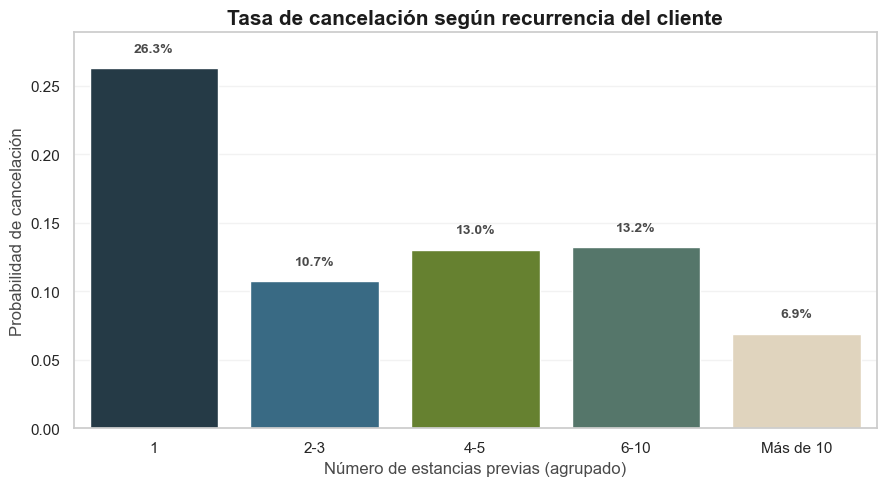

In [19]:
bins = [0, 1, 3, 5, 10, df['recurrence'].max()]
labels = ['1', '2-3', '4-5', '6-10', 'Más de 10']

df['recurrence_grouped'] = pd.cut(
    df['recurrence'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
cancel_recurrence = (
    df.groupby('recurrence_grouped')['ha_cancelado']
      .mean()
)

plt.figure(figsize=(9,5))
color_cycle = cycle(palette_hospitality)
bar_colors = [next(color_cycle) for _ in range(len(cancel_recurrence))]
sns.barplot(
    x=cancel_recurrence.index,
    y=cancel_recurrence.values,
    palette=bar_colors,
    edgecolor="white"
)

for i, val in enumerate(cancel_recurrence.values):
    plt.text(
        i,
        val + 0.01,  
        f"{val:.1%}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color=palette_hospitality[8]  
    )

plt.title(
    "Tasa de cancelación según recurrencia del cliente",
    fontsize=15,
    fontweight='bold',
    color=palette_hospitality[11]
)
plt.xlabel("Número de estancias previas (agrupado)", fontsize=12, color=palette_hospitality[8])
plt.ylabel("Probabilidad de cancelación", fontsize=12, color=palette_hospitality[8])
plt.ylim(0, cancel_recurrence.max() * 1.1)
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()
